# **Loading the dataset**

In [6]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [23]:
# loading the dataset
df=pd.read_excel('final_dataset.xlsx', parse_dates=['Date'],index_col='Date')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **1. Data Overview**
First, let's start with a basic overview of the dataset:

In [10]:
pd.set_option('display.max_columns',50)
df.head()

,Date,CPI_Actual,USD_INR_Price,crude_Price,ECB_rate,gold_Price,gold_Open,gold_High,gold_Low,gold_Vol.,gold_Change %,bond_Price,nifty_Price,Repo_Rate,Inflation Rate (%),Holiday Name,GPR,GPRC_IND,US_Price,BSE_Price,US_federal_target_rate_Actual,Reverse_Repo_Rate,WPI_Actual,Silver_Price
0,2011-12-19,0.093,52.700,93.88,0.01,27559.0,27486.0,27660.0,27373.0,67.03,2.61,8.329,4613.10,0.085,0.093,No,79.634972,0.174591,80.25,15379.34,0.0025,0.075,0.075,79709.0
1,2011-12-20,0.093,52.770,97.22,0.01,27734.0,27540.0,27770.0,27522.0,49.63,0.64,8.276,4544.20,0.085,0.093,No,79.634972,0.174591,79.88,15175.08,0.0025,0.075,0.075,79709.0
2,2011-12-21,0.093,52.400,98.67,0.01,27661.0,27774.0,27960.0,27601.0,73.38,-0.26,8.340,4693.15,0.085,0.093,No,79.634972,0.174591,80.02,15685.21,0.0025,0.075,0.075,79709.0
3,2011-12-22,0.093,52.565,99.53,0.01,27552.0,27600.0,27658.0,27459.0,58.81,-0.39,8.333,4733.85,0.085,0.093,No,79.634972,0.174591,79.96,15813.36,0.0025,0.075,0.075,79709.0
4,2011-12-23,0.093,52.790,99.68,0.01,27632.0,27580.0,27674.0,27577.0,29.90,0.29,8.365,4714.00,0.085,0.093,No,79.634972,0.174591,79.93,15738.70,0.0025,0.075,0.075,79709.0


In [11]:
# basic details of df
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4643 entries, 0 to 4642
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           4643 non-null   datetime64[ns]
 1   CPI_Actual                     4643 non-null   float64       
 2   USD_INR_Price                  4643 non-null   float64       
 3   crude_Price                    4643 non-null   float64       
 4   ECB_rate                       4643 non-null   float64       
 5   gold_Price                     4643 non-null   float64       
 6   gold_Open                      4643 non-null   float64       
 7   gold_High                      4643 non-null   float64       
 8   gold_Low                       4643 non-null   float64       
 9   gold_Vol.                      4643 non-null   float64       
 10  gold_Change %                  4643 non-null   float64       
 11  bond_Price       

In [12]:
df.loc[df['crude_Price']<0]

,Date,CPI_Actual,USD_INR_Price,crude_Price,ECB_rate,gold_Price,gold_Open,gold_High,gold_Low,gold_Vol.,gold_Change %,bond_Price,nifty_Price,Repo_Rate,Inflation Rate (%),Holiday Name,GPR,GPRC_IND,US_Price,BSE_Price,US_federal_target_rate_Actual,Reverse_Repo_Rate,WPI_Actual,Silver_Price
3043,2020-04-18,0.058979,76.558333,-0.363333,0.0,45811.333333,46470.0,46653.0,45355.0,29.73,0.00,6.301,9265.116667,0.044,0.0591,No,68.867830,0.137110,99.84,31608.48,0.0025,0.0375,0.009,79709.0
3044,2020-04-19,0.058955,76.566667,-18.996667,0.0,45767.666667,45935.0,46301.0,45310.0,27.17,0.00,6.255,9263.483333,0.044,0.0591,No,68.840091,0.138348,99.90,31628.24,0.0025,0.0375,0.009,79709.0
3045,2020-04-20,0.058931,76.575000,-37.630000,0.0,45724.000000,45400.0,45949.0,45265.0,24.61,-0.29,6.209,9261.850000,0.044,0.0591,No,68.812351,0.139586,99.96,31648.00,0.0025,0.0375,0.009,79709.0


In [24]:
df.drop(columns=['crude_Price'],inplace=True)

# **2. Time Series Analysis**



## **2.1 Time Series Plot**
Let's visualize the gold price over time:

In [25]:
df['gold_Price']=df['gold_Price'].replace(0,pd.NA).bfill()

In [67]:
df_2=df[~df['Day of the week'].isin(['Saturday','Sunday'])]

In [66]:
df.set_index('Date',inplace=True)

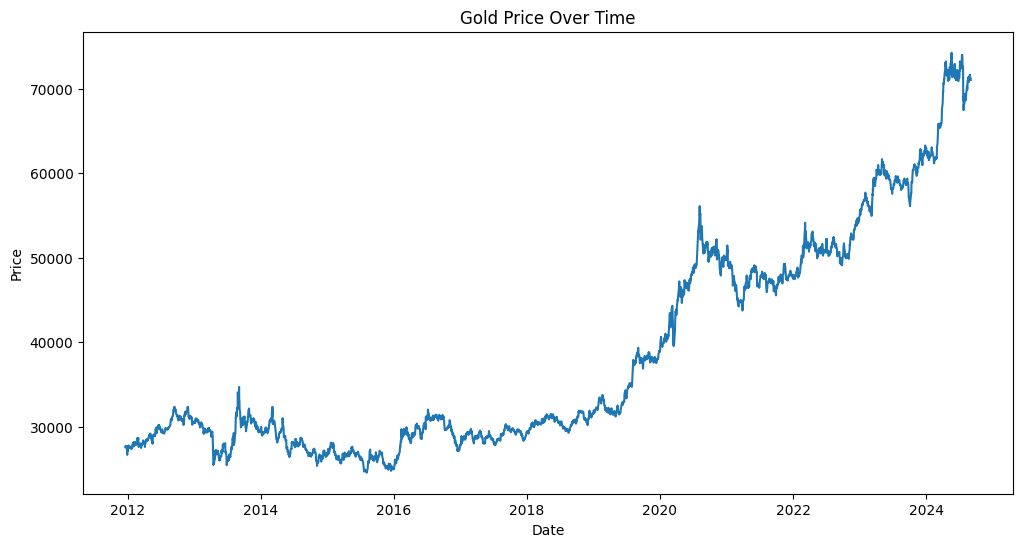

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(df_2.index, df_2['gold_Price'])
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## **2.2 Seasonal Decomposition**
We can decompose the time series to observe trend, seasonality, and residuals:

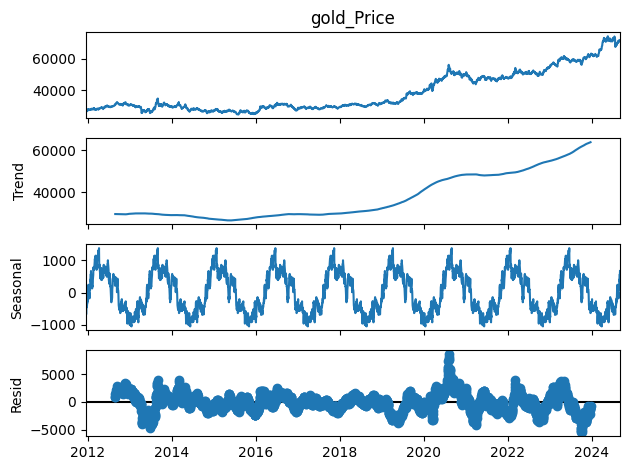

In [69]:
result = seasonal_decompose(df_2['gold_Price'], model='additive', period=365)
result.plot()
plt.tight_layout()
plt.show()

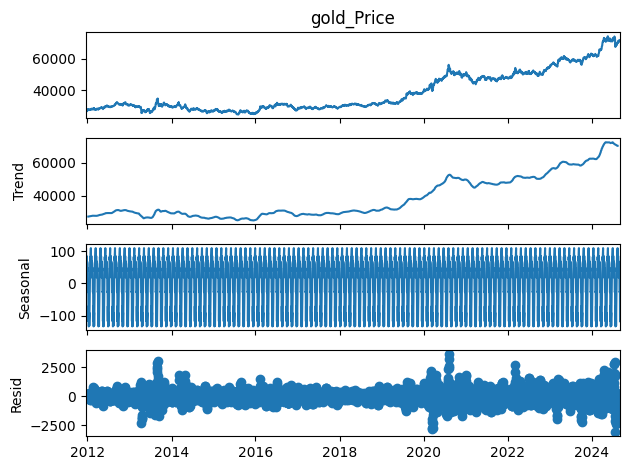

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_1=seasonal_decompose(df_2['gold_Price'],model='additive',period=30)
result_1.plot()
plt.tight_layout()
plt.show()

- Long-term growth: Gold prices have shown significant long-term growth, especially since 2019. This could be due to economic uncertainties, inflation concerns, and increased demand.
- Seasonal patterns: There are consistent seasonal patterns in gold prices, which might be related to cultural factors (e.g., wedding seasons in India) or economic cycles.
- Market shocks: The residuals indicate periods of higher volatility, particularly around 2013-2014 and 2020-2021. These could correspond to major economic events or policy changes affecting gold prices.
- Trend dominance: The trend component appears to be the strongest driver of price changes, outweighing seasonal effects.
- Recent stability: The trend seems to have stabilized somewhat in the most recent period, suggesting a possible plateau in gold prices.
- Predictability: The clear trend and consistent seasonality suggest some level of predictability in gold prices, but the significant residuals indicate that unexpected factors still play a substantial role.

## **2.3 Autocorrelation and Partial Autocorrelation**

These plots can help identify any significant lags in the time series:


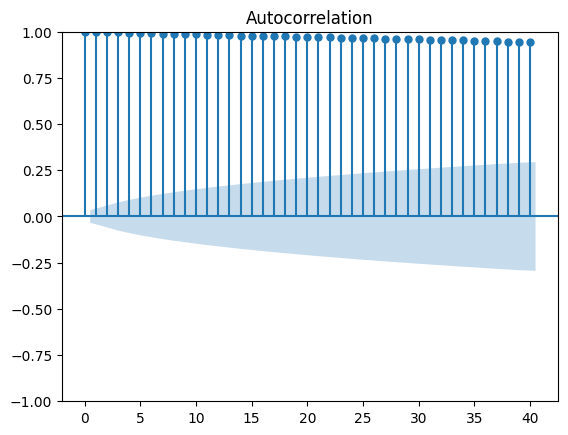

In [71]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_2['gold_Price'],lags=40)
plt.show()

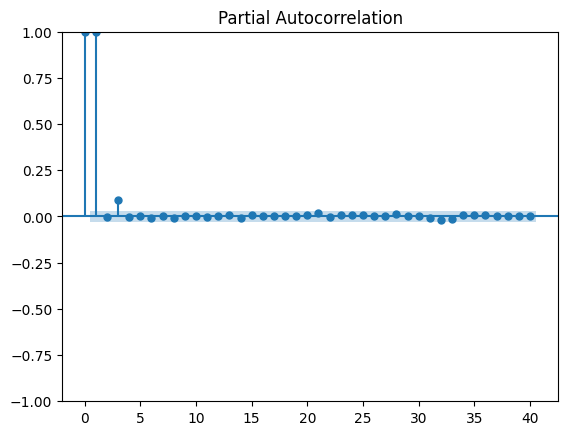

In [39]:
plot_pacf(df['gold_Price'],lags=40)
plt.show()

## **Inference**

### **Autocorrelation Function (ACF) - Top Plot**:
- It measures how the current gold price is related to past prices.
- **Key Points**:
  - High correlation with past prices, meaning today’s price is similar to recent prices.
  - The slow decrease in correlation over time suggests that the series isn’t stationary (it doesn’t have a constant mean and variance over time).

### **Partial Autocorrelation Function (PACF) - Bottom Plot**:
- It measures the direct relationship between today’s price and a past price, removing the effect of prices in between.
- **Key Points**:
  - Very high correlation with the previous day’s price.
  - After the first lag, the correlations drop off, indicating the strongest influence is from the most recent price.

### **Significance of Lag Value 40**:
- We’re looking at how prices are related up to 40 days back.
- This helps us see both short-term and medium-term patterns in the data.

### **Implications**:
1. **Non-stationarity**: The data isn’t stationary, which is typical for financial series.
2. **Strong Autocorrelation**: Today’s gold price is closely related to recent prices.
3. **AR(1) Process**: The data might be well-modeled by considering only the most recent past price.
4. **Predictability**: The strong correlation suggests we can predict future prices to some extent.
5. **Differencing Needed**: To make the series stationary for modeling, we might need to subtract the previous price from the current one.


# **3. Correlation Analysis**

## **3.1 Correlation Matrix**
Let's create a heatmap to visualize correlations between variables:

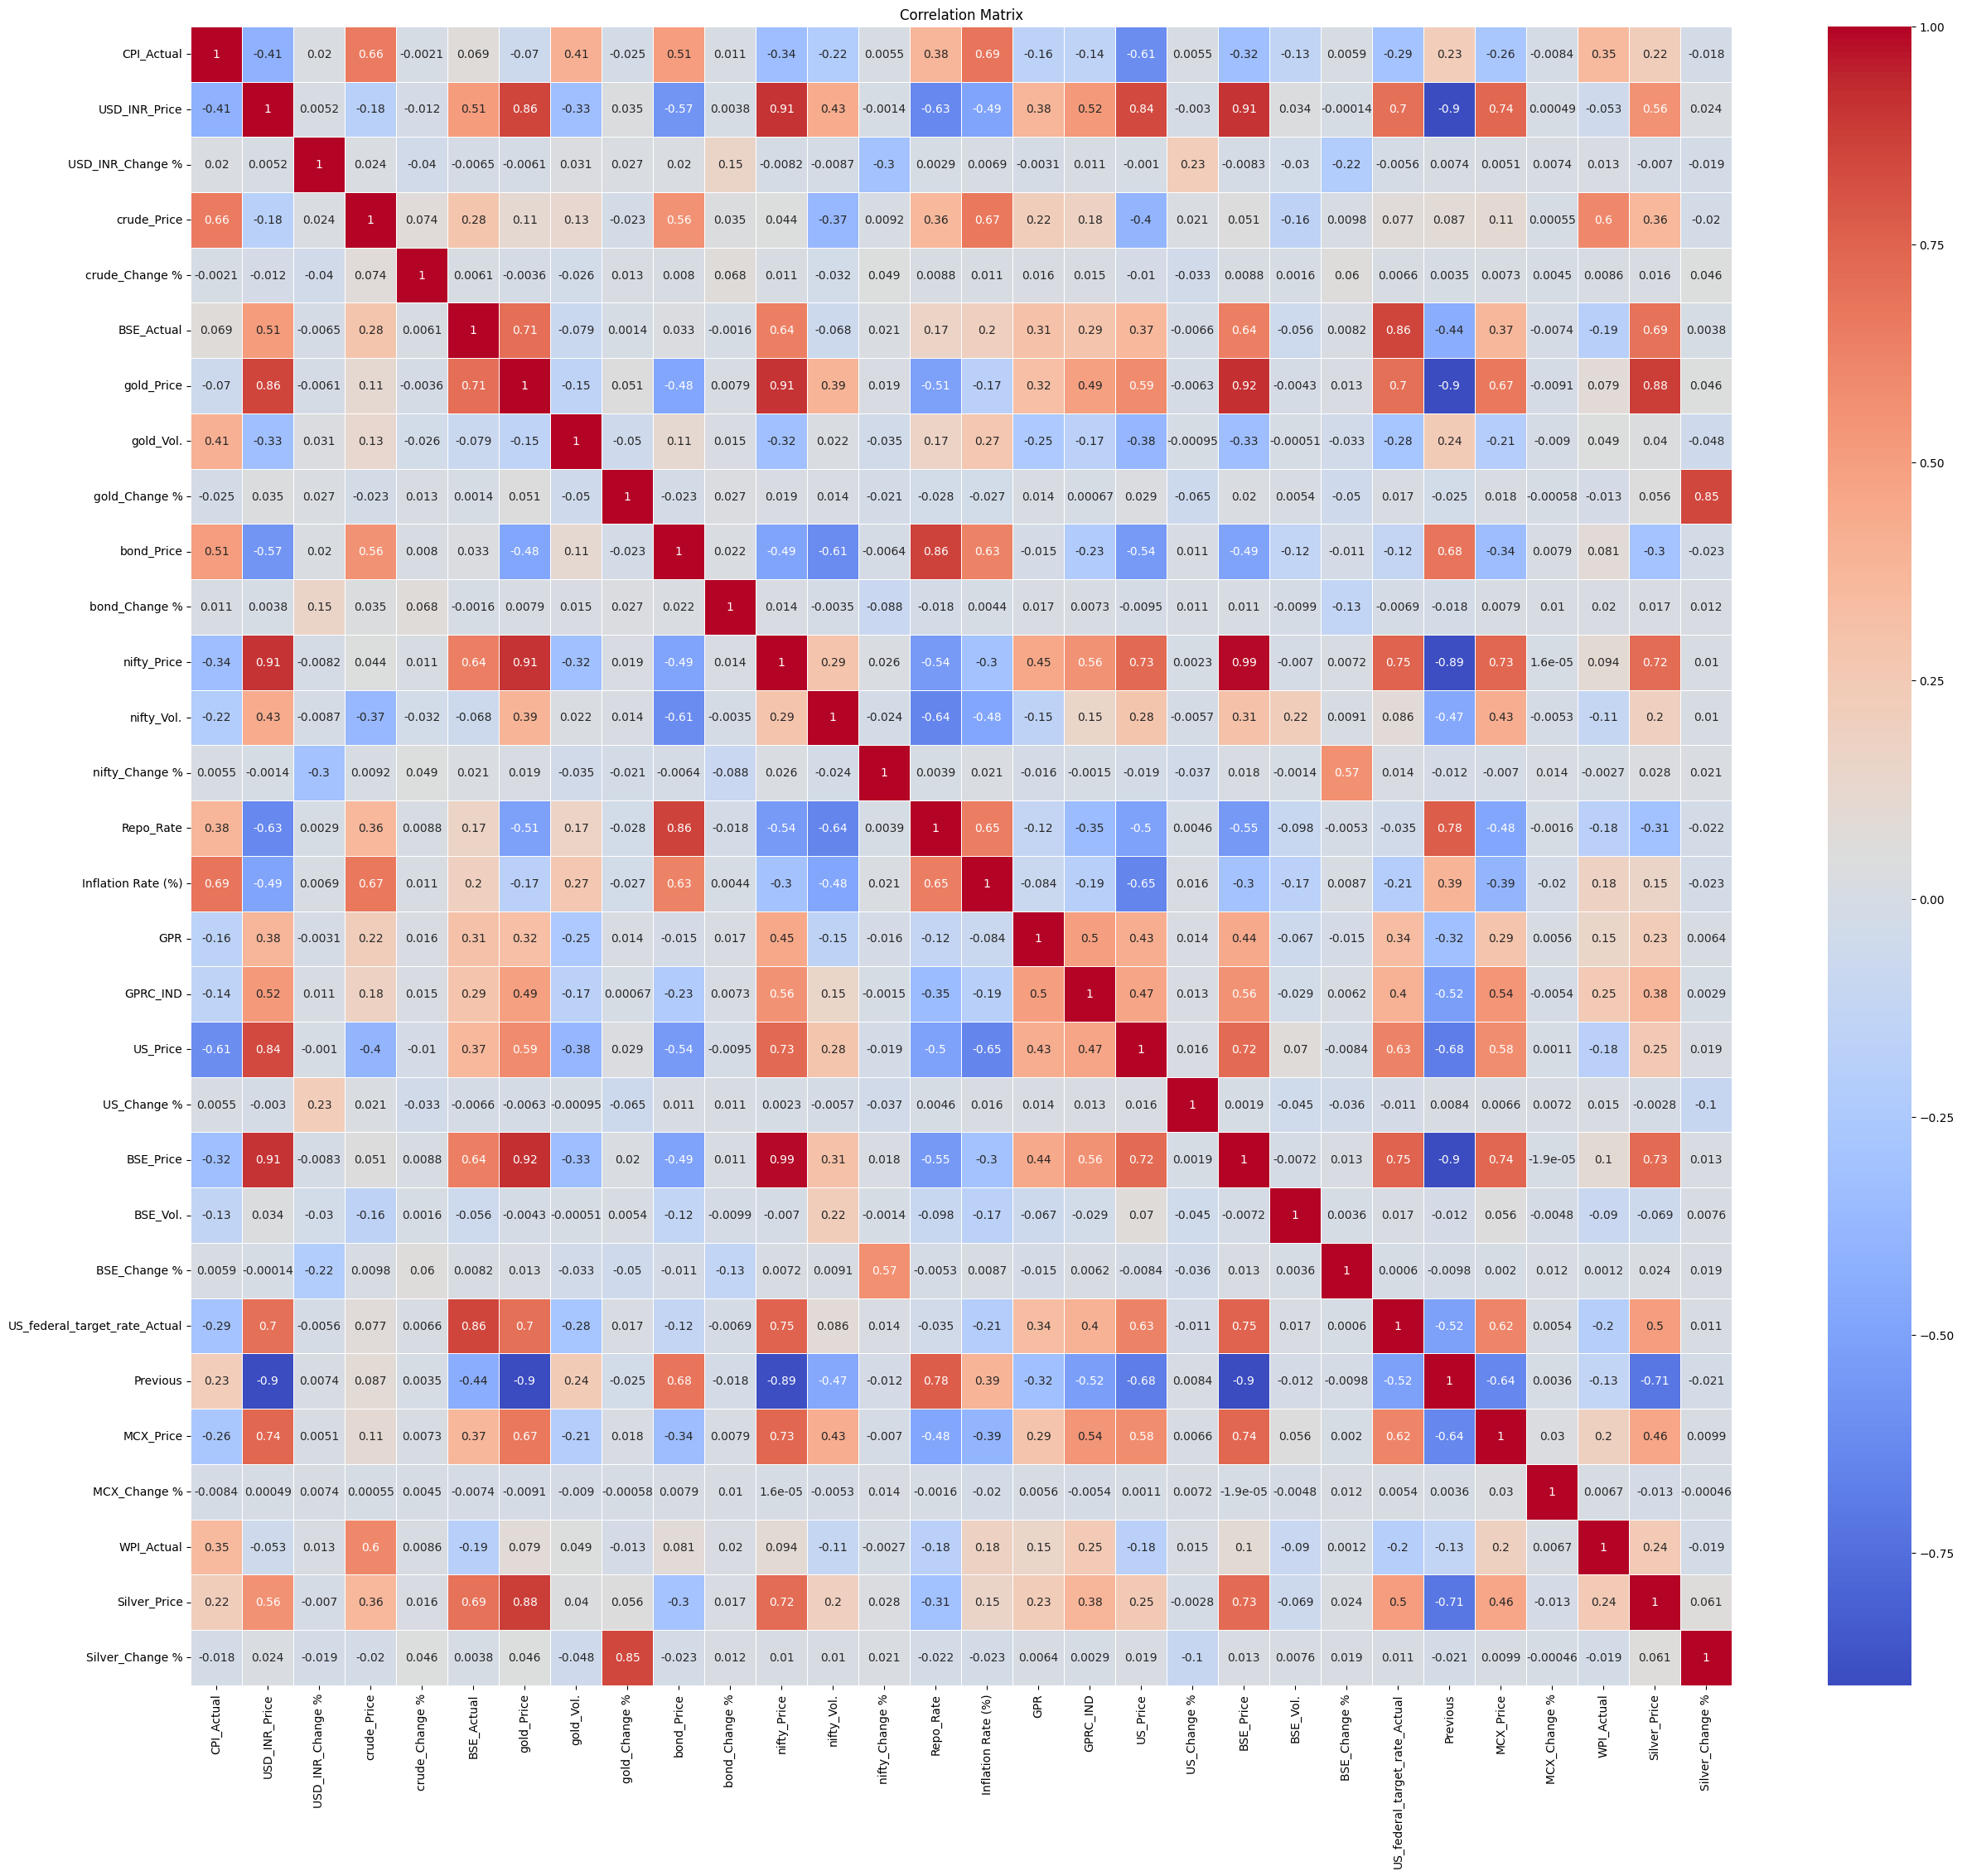

In [ ]:
df_1=df.drop(columns=['Holiday Name'])
plt.figure(figsize=(30, 26))
sns.heatmap(df_1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## **3.2 Scatter Plots**
We can create scatter plots for the most correlated variables with gold price:

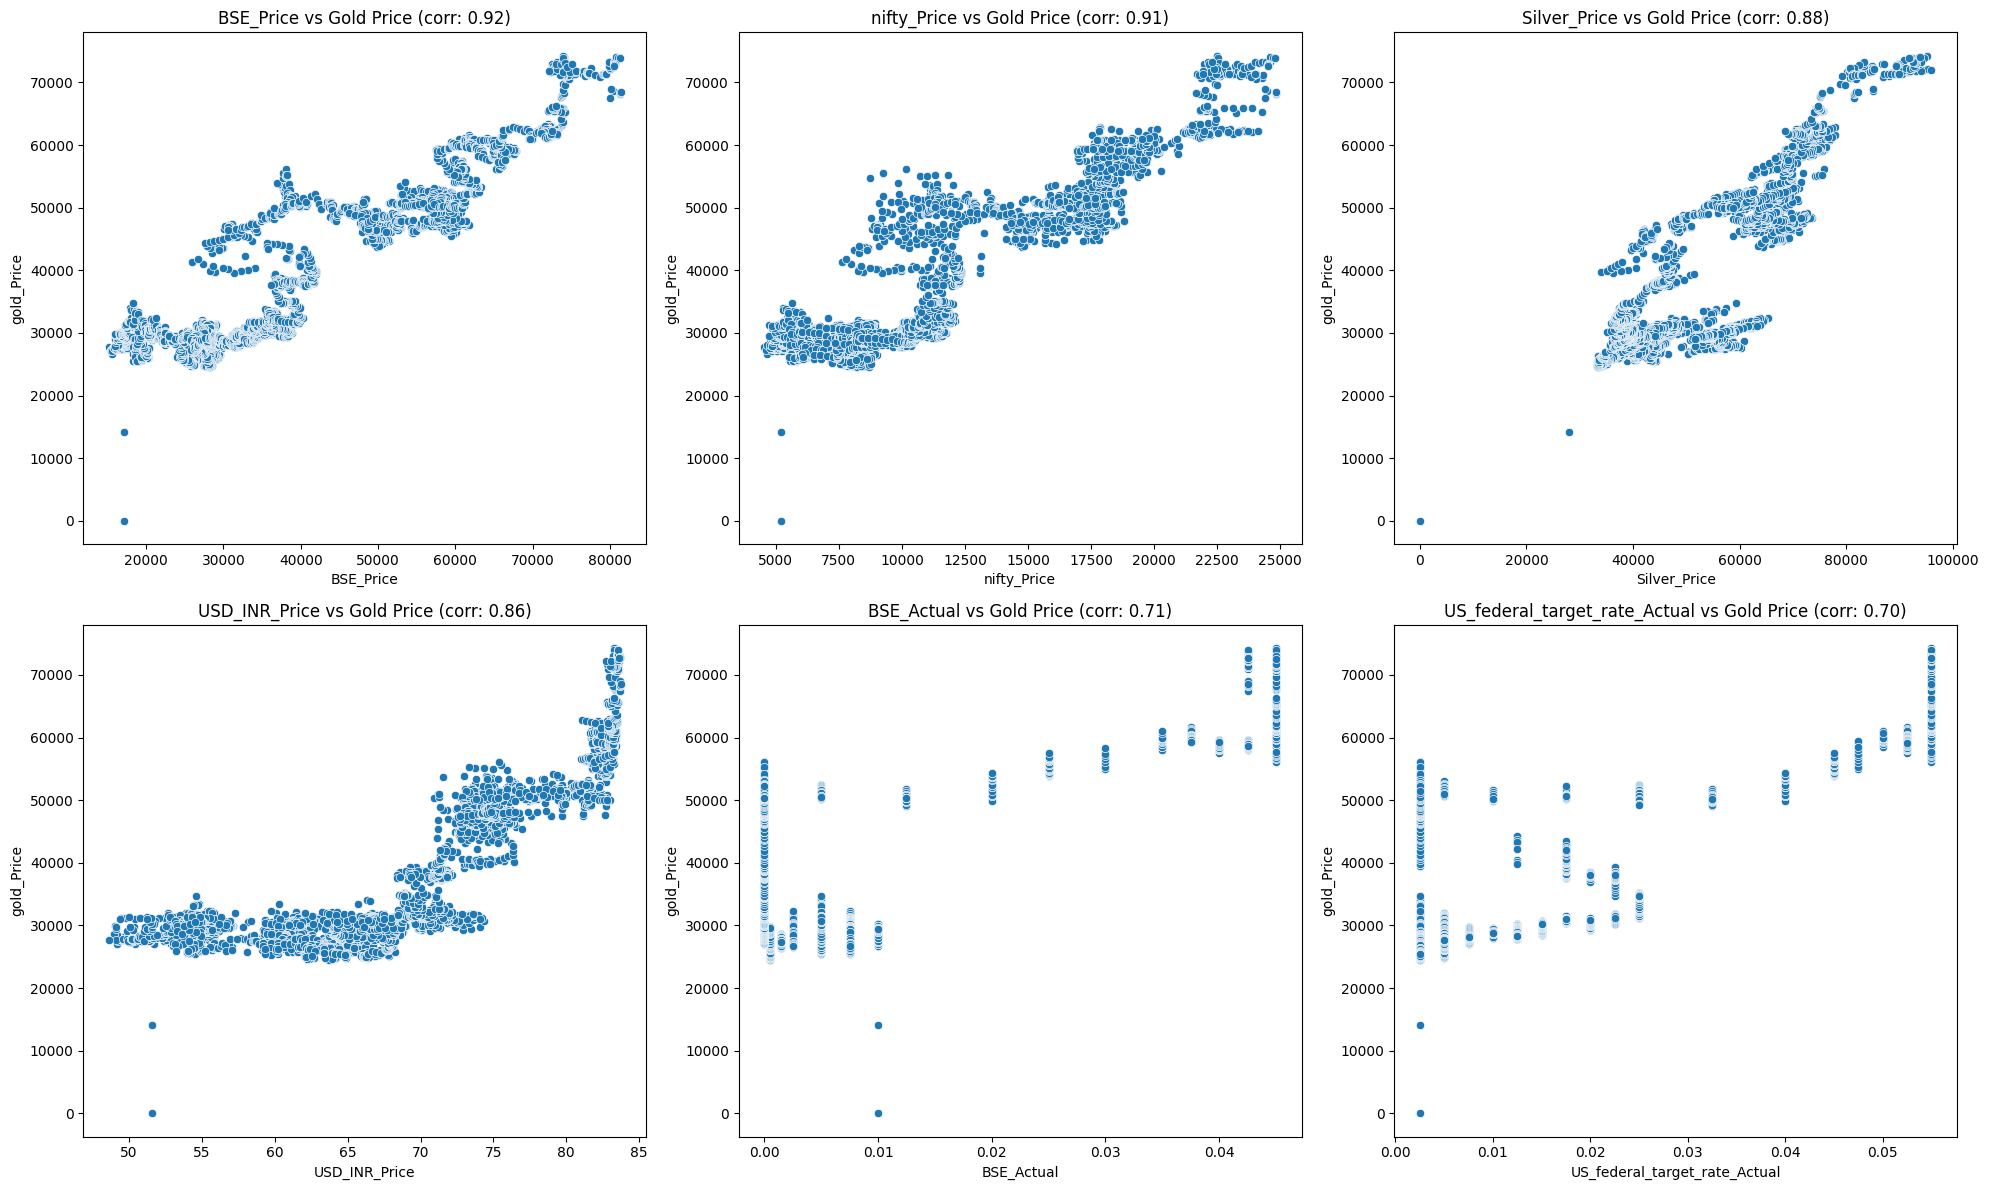

In [ ]:
corr_with_gold = df_1.corr()['gold_Price'].sort_values(ascending=False)
top_corr = corr_with_gold[1:7]  # Exclude gold_Price itself and get top 5

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, (column, correlation) in enumerate(top_corr.items()):
    sns.scatterplot(data=df_1, x=column, y='gold_Price', ax=axes[i])
    axes[i].set_title(f'{column} vs Gold Price (corr: {correlation:.2f})')

plt.tight_layout()
plt.show()

## **3.3 Correlation Values**

gold_Low                         0.999861
gold_High                        0.999819
gold_Open                        0.999672
BSE_Price                        0.919530
nifty_Price                      0.914368
USD_INR_Price                    0.860129
ECB_rate                         0.724462
US_federal_target_rate_Actual    0.710195
volatility                       0.691062
US_Price                         0.587719
GPRC_IND                         0.351536
GPR                              0.292138
Silver_Price                     0.173419
WPI_Actual                       0.071836
gold_Change %                    0.033616
Month                           -0.007756
Inflation Rate (%)              -0.088190
CPI_Actual                      -0.089034
gold_Vol.                       -0.182354
bond_Price                      -0.479330
Repo_Rate                       -0.497399
Reverse_Repo_Rate               -0.895081
Name: gold_Price, dtype: float64


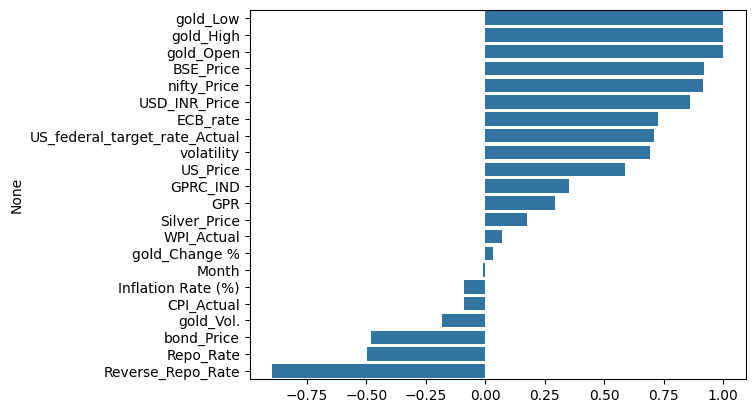

In [73]:
df_1=df_2.drop(columns=['Holiday Name','Day of the week'])
correlation=df_1.corr()['gold_Price'].sort_values(ascending=False)
correlation.drop('gold_Price',inplace=True)
print(correlation)
sns.barplot(y=correlation.index,x=correlation.values)
plt.show()

This plot provides valuable insights into the relationships between gold prices and various financial and economic variables. Here are some key inferences:

- **Strong positive correlations:**
BSE Price (0.92), Nifty Price (0.91), and Silver Price (0.88) have the strongest positive correlations with gold price. This suggests that as stock market indices and silver prices increase, gold prices tend to rise as well.
USD/INR Price (0.86) also shows a strong positive correlation, indicating that gold prices tend to increase as the Indian Rupee weakens against the US Dollar.


- **Moderate positive correlations:** BSE Actual (0.71), US Federal Target Rate (0.70), and MCX Price (0.67) show moderately strong positive correlations with gold price.
US Price (0.59) and GPRC_IND (0.49) also have notable positive correlations.


- **Weak correlations:**
Many variables like crude oil price, volatility measures, and various "Change %" metrics show weak correlations (close to 0) with gold price.


- **Negative correlations:**
Repo Rate (-0.51) and Bond Price (-0.48) have moderate negative correlations with gold price. This suggests that as interest rates rise or bond prices increase, gold prices tend to decrease.
Inflation Rate (-0.17) has a weak negative correlation, which is interesting given gold's reputation as an inflation hedge.


- **Market indicators:**
The strong correlation with stock market indices (BSE, Nifty) might indicate that gold moves in tandem with overall market sentiment or economic conditions.


- **Precious metals relationship:**
The high correlation with silver price (0.88) confirms the close relationship between precious metals.


- **Currency impact:** The strong correlation with USD/INR price emphasizes the importance of currency movements in gold pricing, especially for the Indian market.


- **Interest rates:** The negative correlation with Repo Rate and positive correlation with US Federal Target Rate suggest complex relationships between gold and interest rate policies.

# **4. Distribution Analysis**

## **4.1 Histogram of Gold Price**

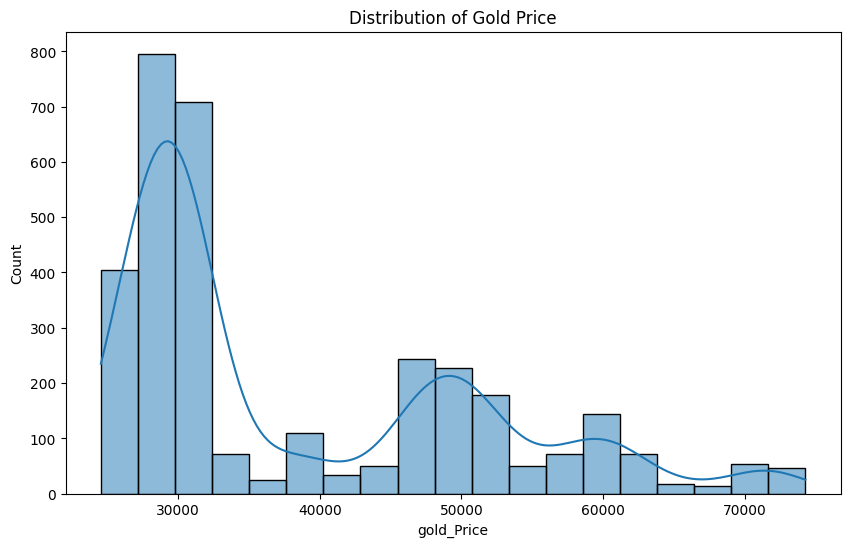

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df_2['gold_Price'], kde=True)
plt.title('Distribution of Gold Price')
plt.show()

**Multiple Market Phases:** The distinct peaks around 30,000, 50,000, and 60,000 INR likely reflect different economic conditions in India, such as the introduction of GST in 2017 and the economic impacts of the COVID-19 pandemic, which may have driven gold prices to cluster around these levels.

**Economic Uncertainty:** The right-skewed distribution, with a tail extending towards higher prices, suggests that during times of economic uncertainty (e.g., demonetization in 2016 or global events like the 2020 pandemic), gold became a safe-haven asset, pushing prices higher.

**Volatility in Gold Prices:** The wide range of prices (20,000 to 70,000 INR) indicates significant volatility in the Indian gold market, which could be attributed to fluctuations in the global economy, changes in currency exchange rates, and shifts in domestic demand, especially during major festivals or wedding seasons.

**Impact of Policy Changes:**The gaps between clusters might correspond to major policy changes in India, such as changes in import duties or currency fluctuations, which caused sudden shifts in gold prices.

**Long-Term Growth:** The gradual increase in price clusters suggests a long-term upward trend in gold prices in India, possibly driven by inflation, rising demand during cultural events, and long-term economic growth.

## **4.2 Box Plot for Monthly Gold Price**

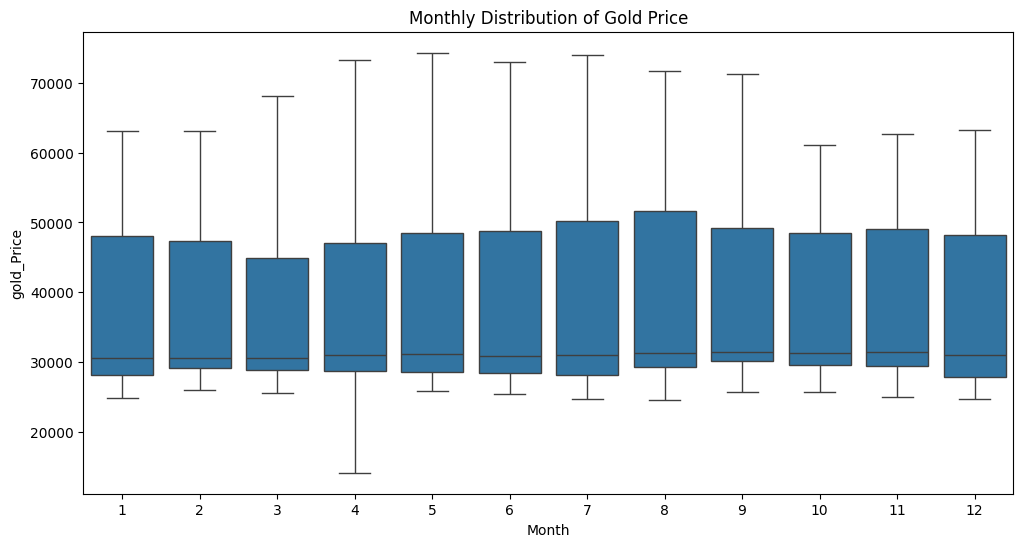

In [77]:
df['Month'] = df.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='gold_Price', data=df)
plt.title('Monthly Distribution of Gold Price')
plt.show()

# **5. Feature Analysis**

## **5.1 Feature Importance (using Random Forest)**

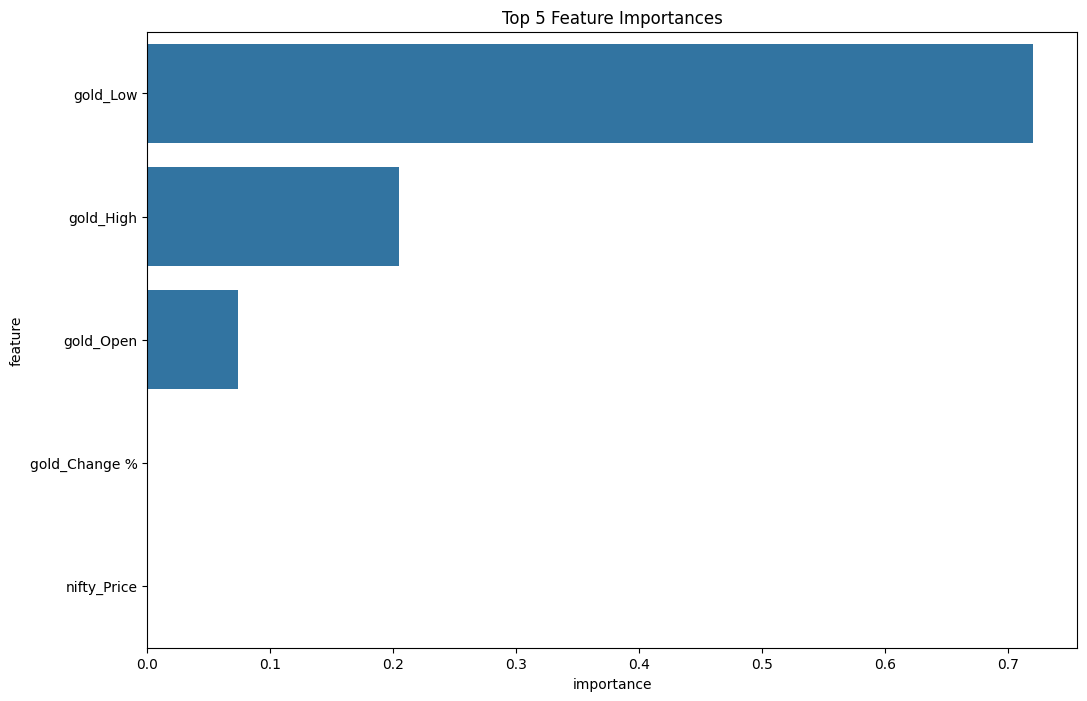

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop(['gold_Price', 'Holiday Name'], axis=1)
y = df['gold_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(5))
plt.title('Top 5 Feature Importances')
plt.show()

# **6. Volatility Analysis**


## **6.1 Rolling Standard Deviation**

<ipython-input-78-c1e9fde85d18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['volatility'] = df_2['gold_Price'].rolling(window=window).std()


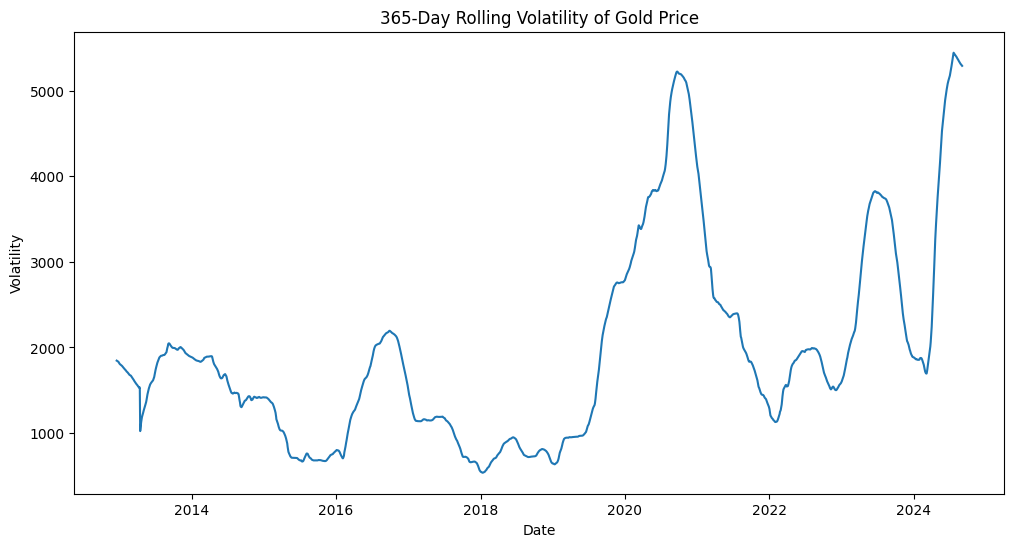

In [78]:
window = 365
df_2['volatility'] = df_2['gold_Price'].rolling(window=window).std()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['volatility'])
plt.title(f'{window}-Day Rolling Volatility of Gold Price')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

<ipython-input-79-930ca4ddda06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['volatility']=df_2['gold_Price'].rolling(window=30).std()


Text(0.5, 1.0, '30-Day Rolling Volatility of Gold Price')

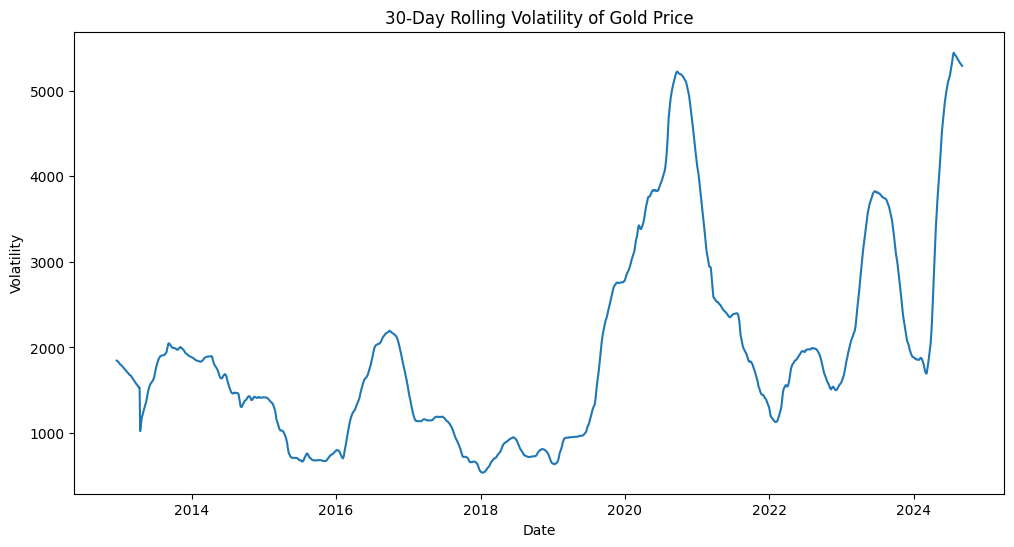

In [79]:
df_2['volatility']=df_2['gold_Price'].rolling(window=30).std()
plt.figure(figsize=(12,6))
plt.plot(df_1.index,df_1['volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('30-Day Rolling Volatility of Gold Price')

- Varying stability: Gold prices in India have had periods of both high and low volatility over the years.
- Major spike in 2012: There was an extreme spike in volatility around 2012, suggesting a period of significant market uncertainty or a major event affecting gold prices.
- Relatively calm period: From about 2016 to 2019, gold prices were generally less volatile, indicating a more stable market.
- Increased volatility since 2020: There's been more frequent spikes in volatility since 2020, possibly due to global events like the COVID-19 pandemic and economic uncertainties.
- Recent trends: The last few years show continued fluctuations, suggesting ongoing market sensitivity to various factors.
- Cyclical nature: Volatility seems to come in waves, with periods of relative calm followed by more turbulent times.
- Normal range: Most of the time, volatility stays below 1000, with occasional spikes above this level.
- Unpredictability: The graph shows that gold prices can become highly volatile unexpectedly, which is important for investors to consider.

# **7. External Factors Analysis**


## **7.1 Gold Price vs Crude Oil Price**

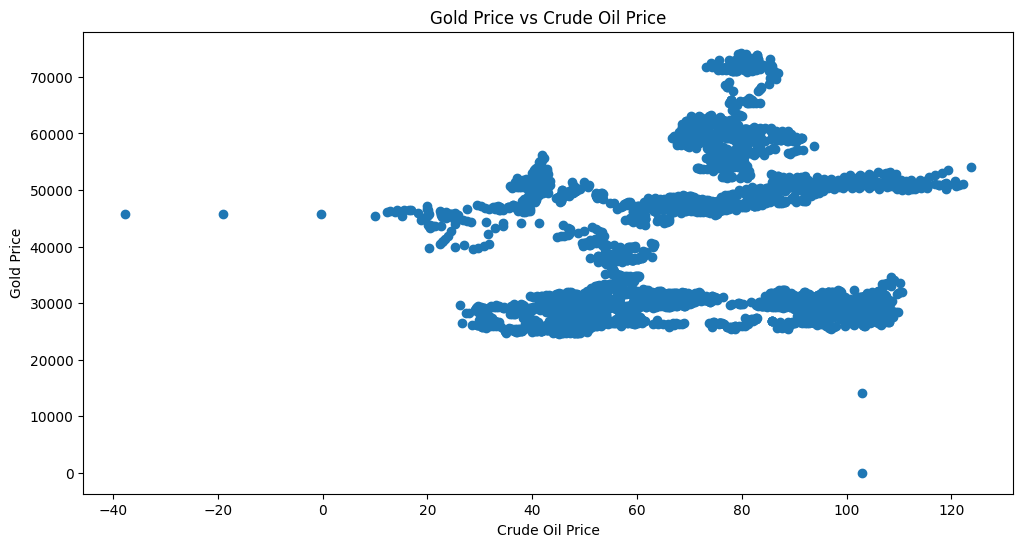

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['crude_Price'], df['gold_Price'])
plt.title('Gold Price vs Crude Oil Price')
plt.xlabel('Crude Oil Price')
plt.ylabel('Gold Price')
plt.show()

In [ ]:
# List of variables to plot against 'gold_Price', excluding 'Holiday Name'
variables = [
    'CPI_Actual', 'USD_INR_Price', 'USD_INR_Change %', 'crude_Price',
    'crude_Change %', 'BSE_Actual', 'gold_Price', 'gold_Vol.',
    'gold_Change %', 'bond_Price', 'bond_Change %', 'nifty_Price',
    'nifty_Vol.', 'nifty_Change %', 'Repo_Rate', 'Inflation Rate (%)',
    'GPR', 'GPRC_IND', 'US_Price', 'US_Change %', 'BSE_Price',
    'BSE_Vol.', 'BSE_Change %', 'US_federal_target_rate_Actual',
    'MCX_Price', 'MCX_Change %', 'WPI_Actual', 'Silver_Price',
    'Silver_Change %', 'Month', 'volatility'
]



# Create scatter plots
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='gold_Price', y=var)
    plt.title(f'Scatter Plot: gold_Price vs {var}')
    plt.xlabel('gold_Price')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Seasonal variation of gold prices during the holiday season

In [56]:
df['Holiday Name'].unique()

array(['No', 'Christmas', 'Makar Sankranti', 'Pongal', 'Rakhi',
       'Karva Chauth', 'Guru Purnima', 'Ugadi and Gudi Padwa', 'Vaisakhi',
       'Akshaya Tritiya', 'Ramadan', 'Navratri', 'Dussehra', 'Bakrid',
       'Dhanteras', 'Diwali', 'Chhath Puja', 'Pongal, Makar Sankranti',
       'Makar Sankranti, Pongal', 'Akshaya Tritiya, Ramadan'],
      dtype=object)

In [58]:
df.reset_index(inplace=True)

In [59]:
df['Day of the week']=df['Date'].dt.day_name()

In [61]:
df.loc[df['gold_Price']<16000]

,Date,CPI_Actual,USD_INR_Price,ECB_rate,gold_Price,gold_Open,gold_High,gold_Low,gold_Vol.,gold_Change %,bond_Price,nifty_Price,Repo_Rate,Inflation Rate (%),Holiday Name,GPR,GPRC_IND,US_Price,BSE_Price,US_federal_target_rate_Actual,Reverse_Repo_Rate,WPI_Actual,Silver_Price,Month,volatility,Day of the week
117,2012-04-14,0.093,51.571667,0.01,14181.5,28502.0,28589.0,28342.0,50.740,-100.0,8.471,5213.70,0.085,0.093,No,88.283624,0.220957,79.78,17113.323333,0.0025,0.075,0.0695,79709.0,4,NaN,Saturday
118,2012-04-15,0.093,51.593333,0.01,14181.5,28425.5,28512.0,28288.5,48.835,0.0,8.463,5219.95,0.085,0.093,No,87.688773,0.217523,79.67,17132.136667,0.0025,0.075,0.0695,79709.0,4,NaN,Sunday


In [82]:
df.reset_index(inplace=True)

<ipython-input-87-a4b9106daf44>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Is_Holiday'] = df_filtered['Holiday Name'].apply(lambda x: 'Holiday' if x != 'No' else 'Non-Holiday')


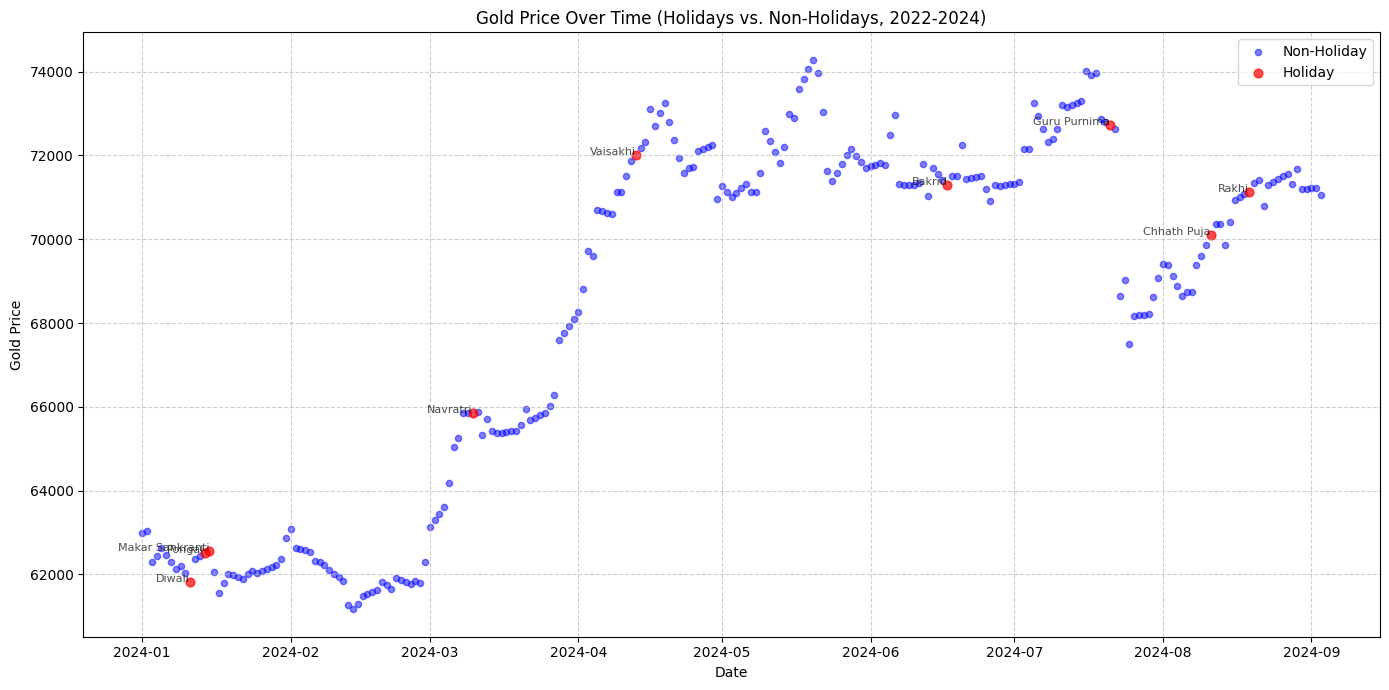

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# Filter data for 2024
df_filtered = df[(df['Date'].dt.year == 2024)]

# column to identify holidays and non-holidays
df_filtered['Is_Holiday'] = df_filtered['Holiday Name'].apply(lambda x: 'Holiday' if x != 'No' else 'Non-Holiday')


plt.figure(figsize=(14, 7))

# Plot non-holiday prices
plt.scatter(df_filtered[df_filtered['Is_Holiday'] == 'Non-Holiday']['Date'],
            df_filtered[df_filtered['Is_Holiday'] == 'Non-Holiday']['gold_Price'],
            color='blue', alpha=0.5, label='Non-Holiday', s=20)

# Plot holiday prices
plt.scatter(df_filtered[df_filtered['Is_Holiday'] == 'Holiday']['Date'],
            df_filtered[df_filtered['Is_Holiday'] == 'Holiday']['gold_Price'],
            color='red', alpha=0.7, label='Holiday', s=40)

# Highlighting holidays with labels
for i, row in df_filtered[df_filtered['Is_Holiday'] == 'Holiday'].iterrows():
    plt.text(row['Date'], row['gold_Price'], row['Holiday Name'], fontsize=8, ha='right', alpha=0.7)

plt.title('Gold Price Over Time (Holidays vs. Non-Holidays, 2022-2024)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [88]:
df.to_excel('major_project.xlsx',index=False)